#### Back to Top

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Exploratory Data Analysis

[Dependent Variable](#Dependent-Variable)

#### Read in the Source Data

In [68]:
df = pd.read_csv('../data/04_Full_DataFrame.csv',
                index_col = 'key_name_date')

In [69]:
df.groupby('cg_name')['did_fill'].describe()

,count,mean,std,min,25%,50%,75%,max
cg_name,,,,,,,,
Apgar,3060.0,0.213072,0.409545,0.0,0.0,0.0,0.0,1.0
Avalanche,3060.0,0.253922,0.435324,0.0,0.0,0.0,1.0,1.0
Bowman Lake,3060.0,0.084967,0.278879,0.0,0.0,0.0,0.0,1.0
Cut Bank,3060.0,0.098366,0.297858,0.0,0.0,0.0,0.0,1.0
Fish Creek,3060.0,0.228105,0.419679,0.0,0.0,0.0,0.0,1.0
Kintla Lake,3060.0,0.177778,0.382388,0.0,0.0,0.0,0.0,1.0
Logging Creek,3060.0,0.026797,0.161517,0.0,0.0,0.0,0.0,1.0
Many Glacier,3060.0,0.429412,0.495073,0.0,0.0,0.0,1.0,1.0
Quartz Creek,3060.0,0.030065,0.170795,0.0,0.0,0.0,0.0,1.0


#### Limit to Only Valid Data Points

In [70]:
df = df[df['available']==1]

#### Examine Features

In [71]:
date_features = ['high_season','weekend','holiday','logan_pass']
air_features = ['aqi','ozone','PM10','PM25']
cg_features = ['fee','sites','flush_toilets','showers','disposal_station','reservations','rv','primitive','isolated']
wx_features = ['PRCP','SNOW','TMAX','TMIN','did_PRCP','did_SNOW']

## Look for High Collinearity within our Feature Sets

### Date Features

Nothing troublesome in the date columns

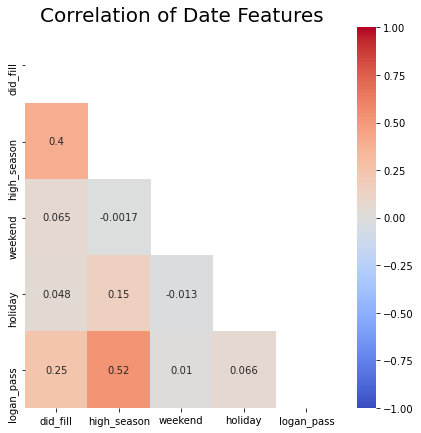

In [72]:
plt.figure(figsize=(7,7))

target = df[['did_fill'] + date_features].corr()

sns.heatmap(target,
            annot = True,
            cmap = 'coolwarm', 
            vmin = -1,
            vmax = 1,
            mask=np.triu(target));

plt.title('Correlation of Date Features',fontsize=20);

### Air Quality Features

* Extremely high correlation between PM25, PM10, and AQI

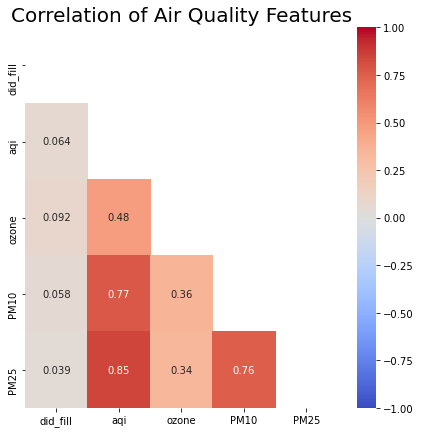

In [73]:
plt.figure(figsize=(7,7))


target = df[['did_fill'] + air_features].corr()

sns.heatmap(target,
            annot = True,
            cmap = 'coolwarm', 
            vmin = -1,
            vmax = 1,
            mask=np.triu(target));

plt.title('Correlation of Air Quality Features',fontsize=20);

#### Do PCA

In [74]:
sc_air = StandardScaler()
air_scaled = sc_air.fit_transform(df[air_features])

pca_air = PCA(random_state = 42)

pca_air.fit(air_scaled)

z_air = pca_air.transform(air_scaled)

pca_air.explained_variance_ratio_

array([0.70979845, 0.19056727, 0.06509495, 0.03453933])

### Campground Features

* High correlations across all features, given there's only 13 campgrounds

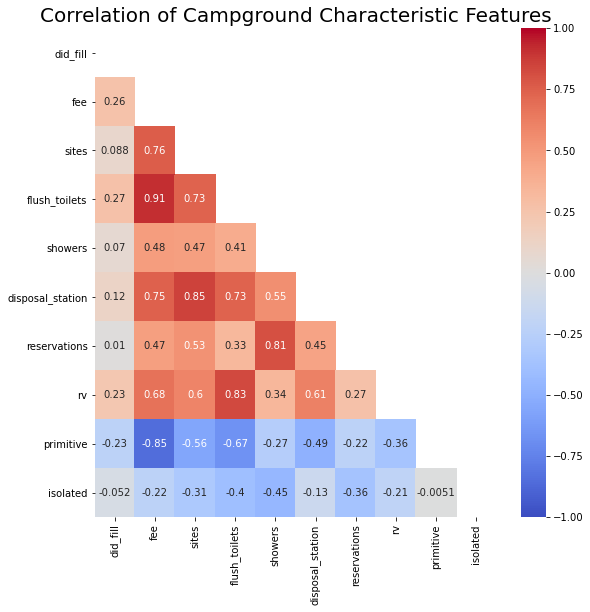

In [75]:
plt.figure(figsize=(9,9))

target = df[['did_fill'] + cg_features].corr()

sns.heatmap(target,
            annot = True,
            cmap = 'coolwarm', 
            vmin = -1,
            vmax = 1,
            mask=np.triu(target));

plt.title('Correlation of Campground Characteristic Features',fontsize=20);

Justification
* Can't use fee because I can't assume its been the same value for 20 years
* Use sites because its an integer
* Use primitive




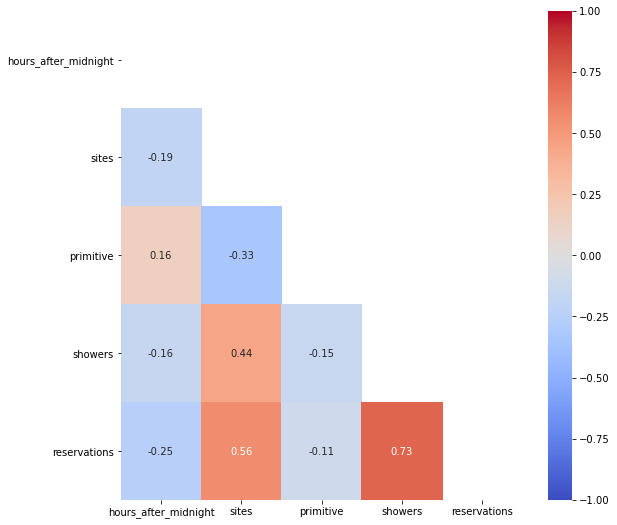

In [76]:
plt.figure(figsize=(9,9))

target = df.loc[df['did_fill']==1,
                ['hours_after_midnight'] + ['sites','primitive','showers','reservations']].corr()

sns.heatmap(target,
            annot = True,
            cmap = 'coolwarm', 
            vmin = -1,
            vmax = 1,
            mask=np.triu(target));

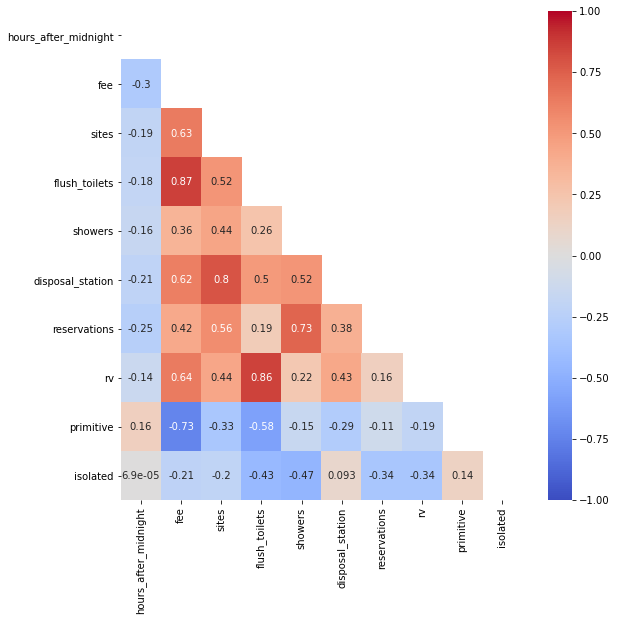

In [77]:
plt.figure(figsize=(9,9))

target = df.loc[df['did_fill']==1,
                ['hours_after_midnight'] + cg_features].corr()

sns.heatmap(target,
            annot = True,
            cmap = 'coolwarm', 
            vmin = -1,
            vmax = 1,
            mask=np.triu(target));

#### Do some PCA

In [78]:
sc_cg = StandardScaler()
cg_scaled = sc_cg.fit_transform(df[cg_features])

pca_cg = PCA(random_state = 42)

pca_cg.fit(cg_scaled)

z_cg = pca_cg.transform(cg_scaled)

pca_cg.explained_variance_ratio_

array([0.57989452, 0.1642395 , 0.0956184 , 0.07153955, 0.0477005 ,
       0.02765779, 0.01126901, 0.00148909, 0.00059164])

### Weather Features

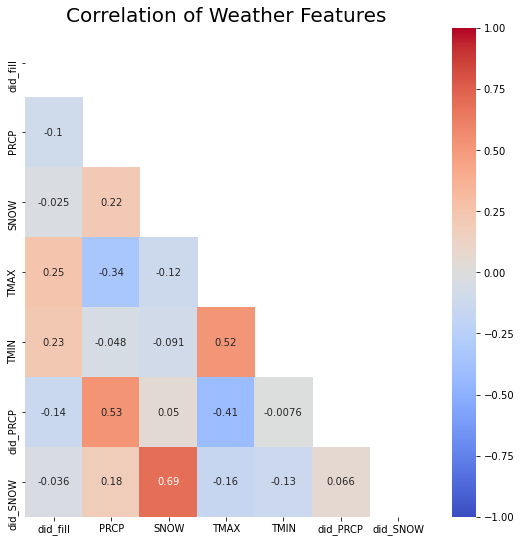

In [79]:
plt.figure(figsize=(9,9))

target = df[['did_fill'] + wx_features].corr()

sns.heatmap(target,
            annot = True,
            cmap = 'coolwarm', 
            vmin = -1,
            vmax = 1,
            mask=np.triu(target));

plt.title('Correlation of Weather Features',fontsize=20);

-----------

# Dependent Variable

#### What percent of available days did a campground fill?

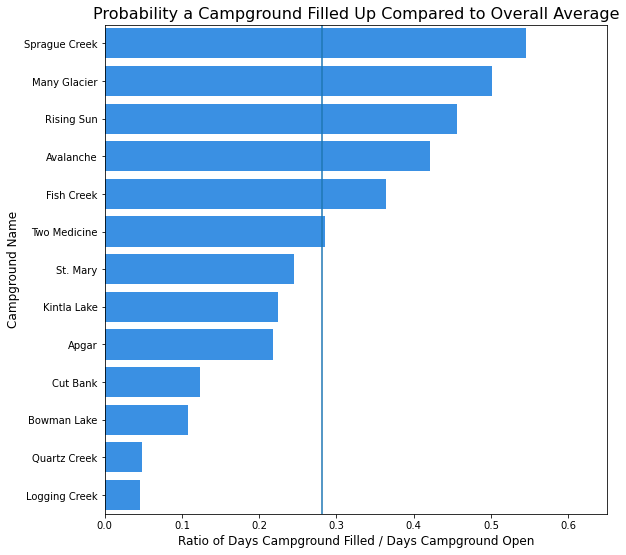

In [89]:
df_fill_perc = pd.DataFrame(
    df.groupby('cg_name')['did_fill'].mean(
    )).sort_values('did_fill',
                   ascending = False)

fig_dims = (9,9)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data = df_fill_perc,
            y = df_fill_perc.index,
            x = 'did_fill',
            color = 'dodgerblue',
            orient = 'h')

ax.set_title('Probability a Campground Filled Up Compared to Overall Average',fontsize=16)
ax.set_xticks(np.arange(0,1.1,0.1))

ax.set_xlim(0,0.65)

plt.xlabel('Ratio of Days Campground Filled / Days Campground Open',fontsize=12)
plt.ylabel('Campground Name',fontsize=12)

plt.axvline(df['did_fill'].mean());

#### How did this percent change over time?

In [28]:
df.columns

Index(['cg_name', 'date_x', 'did_fill', 'available', 'time_24',
       'hours_after_midnight', 'year', 'month_num', 'month_text',
       'day_of_year', 'day_of_month', 'weekday', 'high_season', 'weekend',
       'holiday', 'logan_pass', 'aqi', 'ozone', 'PM10', 'PM25', 'visits',
       'fee', 'sites', 'flush_toilets', 'showers', 'disposal_station',
       'reservations', 'rv', 'primitive', 'isolated', 'cg_supply_y', 'PRCP',
       'SNOW', 'TMAX', 'TMIN', 'did_PRCP', 'did_SNOW'],
      dtype='object')

In [43]:
df_fill_years = pd.DataFrame(df.groupby(['year'])['did_fill'].mean())

df_aqi_years = pd.DataFrame(df.groupby(['year'])['aqi'].max())

In [44]:
df_fill_years['aqi'] = pd.DataFrame(df.groupby(['year'])['aqi'].max())

In [45]:
df_fill_years

,did_fill,aqi
year,,
2000,0.128155,132
2001,0.150907,139
2002,0.180699,62
2003,0.090674,165
2004,0.124272,62
2005,0.170337,71
2006,0.163212,90
2007,0.119819,157
2008,0.156634,80


In [47]:
np.arange(0,1,.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [98]:
list(df_fill_years['aqi'])

[str(x) for x in list(df_fill_years['aqi'])]

['132',
 '139',
 '62',
 '165',
 '62',
 '71',
 '90',
 '157',
 '80',
 '84',
 '61',
 '66',
 '94',
 '67',
 '141',
 '180',
 '65',
 '250',
 '182',
 '75']

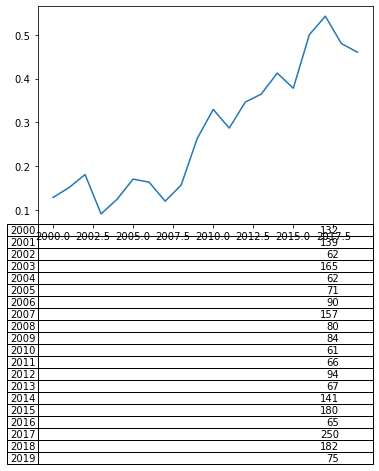

In [107]:
plt.plot(df_fill_years['did_fill'])

plt.table(cellText =[[str(x)] for x in list(df_fill_years['aqi'])],
         rowLabels = df_fill_years.index,
#          colLabels = df_fill_years.index
         )

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_facecolor'

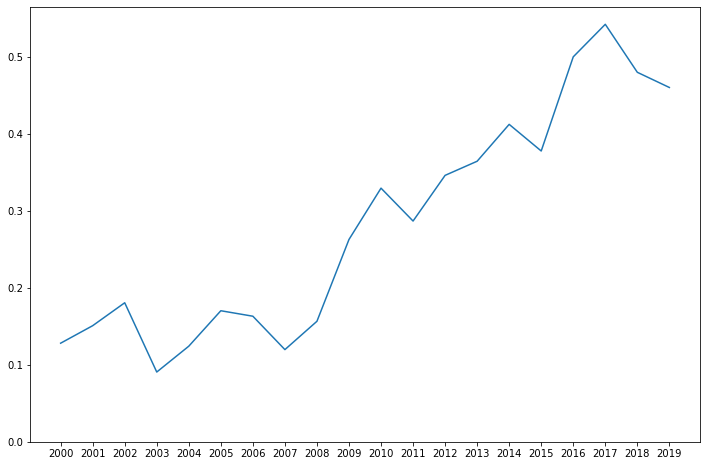

In [137]:
plt.figure(figsize=(12,8))

plt.plot(df_fill_years['did_fill'])

plt.yticks(np.arange(0,0.6,.1))
plt.xticks(range(2000,2020))

plt.set_facecolor(color = 'whitesmoke')

;

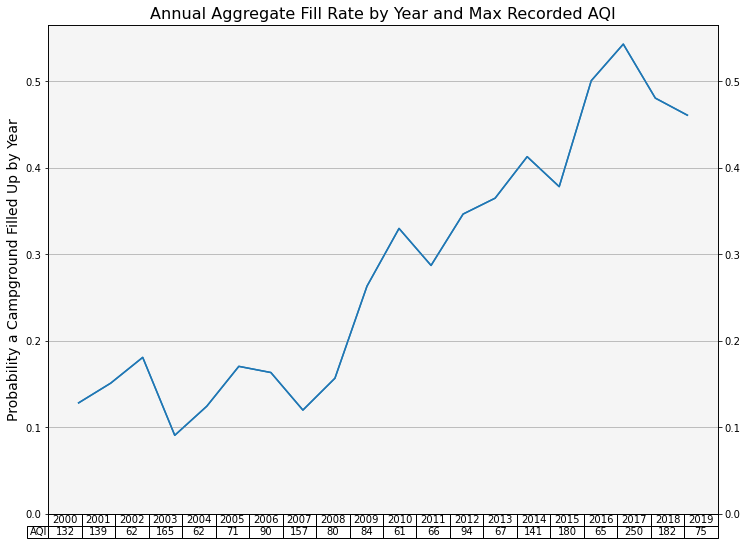

In [151]:
fig_dims = (12,9)
fig, ax1 = plt.subplots(figsize = fig_dims)

ax2 = ax1.twinx()
ax2.plot(df_fill_years['did_fill'])
ax1.plot(df_fill_years['did_fill'])

ax2.set_yticks(np.arange(0,0.6,.1))
ax1.set_yticks(np.arange(0,0.6,.1))

# ax2.set_ylabel('Max Recorded AQI in Summer Months',fontsize = 14,color = 'red')
ax1.set_ylabel('Probability a Campground Filled Up by Year',fontsize = 14)
ax1.set_xticks(range(2000,2020))

plt.grid()
ax1.set_facecolor(color = 'whitesmoke')



plt.table(cellText =[[str(x) for x in list(df_fill_years['aqi'])]],
          rowLabels = ["AQI"],
          loc='bottom',
          colLabels = df_fill_years.index,
          cellLoc='center'
         )

plt.title("Annual Aggregate Fill Rate by Year and Max Recorded AQI",fontsize = 16);


In [ ]:
df_fill_perc = pd.DataFrame(
    df.groupby('cg_name')['did_fill'].mean(
    )).sort_values('did_fill',
                   ascending = False)

fig_dims = (9,9)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data = df_fill_perc,
            y = df_fill_perc.index,
            x = 'did_fill',
            color = 'dodgerblue',
            orient = 'h')

ax.set_title('Probability a Campground Filled Up Compared to Overall Average',fontsize=16)
ax.set_xticks(np.arange(0,1.1,0.1))

ax.set_xlim(0,0.65)

plt.xlabel('Ratio of Days Campground Filled / Days Campground Open',fontsize=12)
plt.ylabel('Campground Name',fontsize=12)

plt.axvline(df['did_fill'].mean());

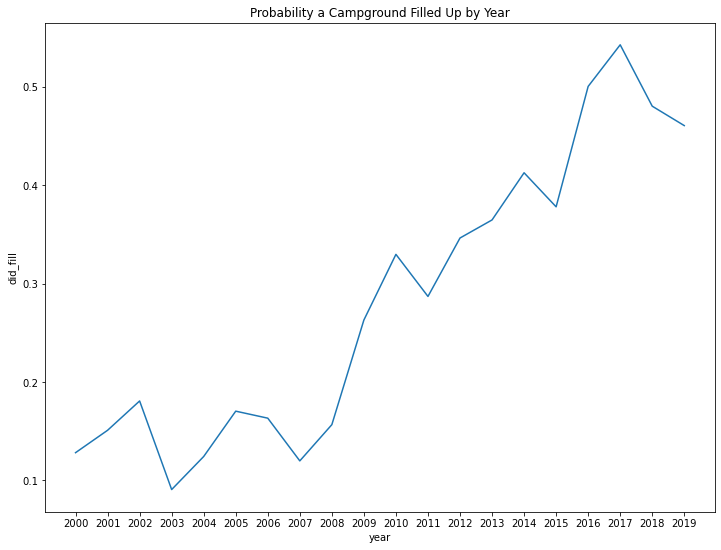

In [92]:
fig_dims = (12,9)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(data = df_fill_years,
            x = df_fill_years.index,
            y = 'did_fill')


ax.set_title('Probability a Campground Filled Up by Year')
ax.set_xticks(list(df_fill_years.index));

In [162]:
df.loc[df['did_fill']==1,]

,cg_name,date_x,did_fill,available,time_24,hours_after_midnight,year,month_num,month_text,day_of_year,...,rv,primitive,isolated,cg_supply_y,PRCP,SNOW,TMAX,TMIN,did_PRCP,did_SNOW
key_name_date,,,,,,,,,,,,,,,,,,,,,
2000-05-05_Apga,Apgar,2000-05-05,1,1,09:25,9.42,2000,5,May,126,...,1,0,0,173,0.00,0.0,59.0,29.0,0,0
2000-06-03_SpCr,Sprague Creek,2000-06-03,1,1,21:01,21.02,2000,6,Jun,155,...,1,0,0,886,0.00,0.0,71.0,42.0,0,0
2000-06-13_SpCr,Sprague Creek,2000-06-13,1,1,18:00,18.00,2000,6,Jun,165,...,1,0,0,886,0.50,0.0,62.0,44.0,1,0
2000-06-15_SpCr,Sprague Creek,2000-06-15,1,1,16:00,16.00,2000,6,Jun,167,...,1,0,0,886,0.67,0.0,58.0,49.0,1,0
2000-06-17_SpCr,Sprague Creek,2000-06-17,1,1,19:41,19.68,2000,6,Jun,169,...,1,0,0,973,0.05,0.0,69.0,44.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-12_StMa,St. Mary,2019-09-12,1,1,16:28,16.47,2019,9,Sep,255,...,1,0,0,686,0.00,0.0,64.0,38.0,0,0
2019-09-12_TwoM,Two Medicine,2019-09-12,1,1,14:25,14.42,2019,9,Sep,255,...,1,0,1,734,0.00,0.0,55.0,38.0,0,0
2019-09-13_MaGl,Many Glacier,2019-09-13,1,1,09:50,9.83,2019,9,Sep,256,...,1,0,1,725,0.00,0.0,59.0,50.0,0,0


In [226]:
fill_order = df.loc[(df['did_fill']==1) & (df['high_season'] ==1) & (df['year']>=2010),
                   ].groupby('cg_name')['hours_after_midnight'].mean().sort_values(ascending=True)

fill_order

cg_name
St. Mary         10.671010
Many Glacier     10.692816
Fish Creek       10.835553
Sprague Creek    11.901048
Rising Sun       12.588299
Two Medicine     13.946486
Kintla Lake      14.096994
Avalanche        14.203623
Apgar            14.266208
Cut Bank         16.048031
Bowman Lake      16.243913
Logging Creek    16.806351
Quartz Creek     16.862125
Name: hours_after_midnight, dtype: float64

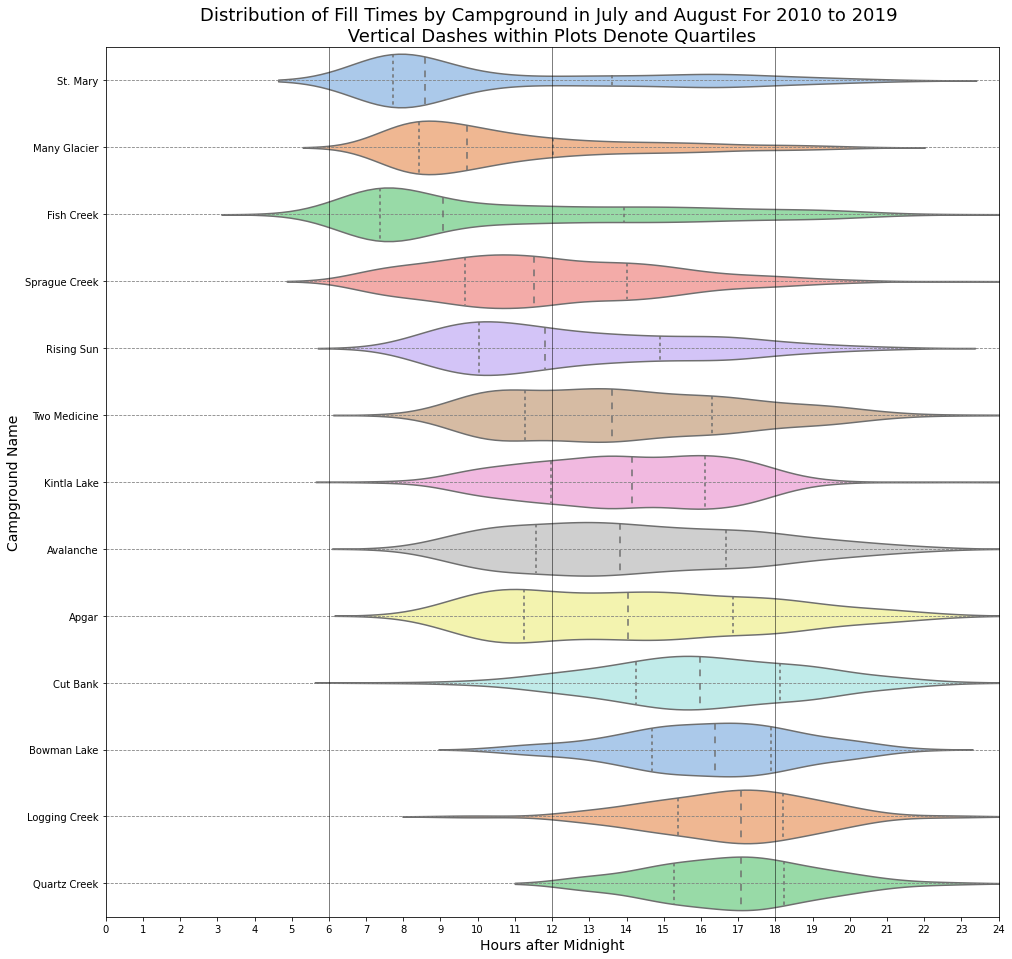

In [227]:
plt.figure(figsize=(16,16))

sns.violinplot(data=df.loc[(df['did_fill']==1) & (df['high_season'] ==1) & (df['year']>=2010),], 
               x="hours_after_midnight",
               y="cg_name",
#                hue="high_season",
               scale = 'width',
#                split = True,
               inner = 'quartile',
             order = fill_order.index,
               palette = 'pastel',
              )


plt.axvline(6,color='black',linestyle='solid',lw=0.5)
plt.axvline(12,color='black',linestyle='solid',lw=0.5)
plt.axvline(18,color='black',linestyle='solid',lw=0.5)

plt.title("Distribution of Fill Times by Campground in July and August For 2010 to 2019 \n Vertical Dashes within Plots Denote Quartiles ",
          fontsize = 18)


plt.xticks(range(0,25,1))
plt.xlim(0,24)
plt.ylabel('Campground Name', fontsize = 14)

plt.xlabel('Hours after Midnight', fontsize = 14)

# plt.legend(fontsize = 12,loc = 'upper left')

plt.grid(axis = 'y',
         color = 'grey',
         linestyle = "--")